In [1]:
# Import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from utils import read_jsonl, write_json

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Import data 

data = read_jsonl("../data/danewsroom.jsonl")

In [4]:
df = pd.DataFrame(data)

In [5]:
# Explore stinky data

df_stinky = df[df["density"] > 5]


,url,archive,title,date,text,summary,density,coverage,compression,compression_bin,coverage_bin,density_bin,site,domain,text_len,valid
2,http://www.bt.dk/udland/700-brandfolk-kaemper-mod-skovbrande,https://web.archive.org/web/20090816213500/http://www.bt.dk:80/udland/700-brandfolk-kaemper-mod-skovbrande,700 brandfolk kæmper mod skovbrande,20090816213500,"- Lørdag den 15. august 2009, 05:26\n\nDer er indført undtagelsestilstand i bjergene ved Santa Cruz i Californien, hvor 700 brandfolk kæmper mod skovbrande, som har sendt flere end 2000 på flugt.\n\nSkovbrandene i Santa Cruz 100 kilometer syd for San Francisco i den amerikanske delstat Californien er stadig ikke under kontrol, og fredag blev der indført undtagelsestilstand i området. Det betyder, at penge og anden hjælp hurtigere kan blive kanaliseret derhen, hvor der er behov. Ilden har tvunget flere end 2000 mennesker til at forlade deres hjem, og 700 brandfolk forsøger at få bugt med flammerne, der ifølge avise San Francisco Chronicle fredag truede med at ødelægge 250 hjem. I Santa Barbara også i Californien er 150 hjem truet af skovbrande. Her forsøger 1600 brandfolk at slukke ilden. Årsagen til brandene, som brød ud onsdag er endnu ukendte./ritzau/dpa","Der er indført undtagelsestilstand i bjergene ved Santa Cruz i Californien, hvor 700 brandfolk kæmper mod skovbrande, som har sendt flere end 2000 på flugt. - Udland",26.166667,0.966667,5.266667,low,high,extractive,www.bt.dk,bt,864,True
3,http://www.kristeligt-dagblad.dk/familieliv/alle-vil-laese-om-boerns-selvfoelelse,https://web.archive.org/web/20150702194844/http://www.kristeligt-dagblad.dk/familieliv/alle-vil-laese-om-boerns-selvfoelelse,Forældre skal ikke lære børn at blive perfekte,20150702194844,"Den svenske psykolog Petra Krantz Lindgrens råd om børns selvfølelse har vakt en livlig debat på de sociale medier. Få de gode råd samlet her\n\n""Forældre skal ikke lære børn at blive perfekte. Forældre skal lære børn, at de er gode nok, helt som de er.""\n\nRådet kommer fra den svenske psykolog Petra Krantz Lindgrens 8-årige datter Fia.\n\nLæs interview med Petra Krantz Lindgren her: ""Forældre skal lære børn, at de er gode nok""\n\nPetra Krantz Lindgren har nu skrevet en bog om børns selvfølelse, fyldt med anvendelige råd, som har været diskuteret Kristeligt Dagblads spalter og debatsider den seneste uge.\n\nLæs anmeldelse af bogen ""Børns selvfølelse"" her\n\nHvis du ikke har læst med, får du her et overblik over Petra Krantz Lindgrens råd.\n\n(Klik på titlen for at komme til artiklen)\n\n""En veludviklet og sund selvfølelse er både robust og stabil over tid, men den er hverken usårlig eller konstant,"" skriver Petra Krantz Lindgren.\n\n""Det viser sig næsten altid, at det første, forældrene har brug for, er at lære sig selv at lytte til deres børn. Børn er nemlig hverken specielt interesserede i at tale med eller lytte til forældrene, hvis forældrene ikke lytter til dem,"" skriver Petra Krantz Lindgreen.\n\nPetra Krantz Lindgren havde følgende samtale med sin otte-årige datter:""Fia: Mor, der er noget, jeg vil fortælle dig … Jeg vil altid elske dig! Jeg: Og jeg har noget, jeg vil fortælle dig. Jeg vil altid elske dig! Der er noget, jeg har tænkt på min skat … Elsker du også dig selv? Fia: For det meste gør jeg. Men når du skælder mig ud, har jeg svært ved at elske mig selv.""\n\n""Hvis man italesætter den dårlige samvittighed, kan man finde frem til en forståelse for sine egne og andres behov og dermed få mulighed for at agere anderledes i fremtiden. Eller opdage, at det måske alligevel ikke var en fejl,"" skriver Petra Krantz Lindgren.\n\n""Hvis drengen får lov til at påvirke sit liv i andre, for ham, vigtige henseender, kan han måske sove glad og tilfreds i forvisning om, at han alligevel bliver betragtet som et kompetent individ, der tager ansvar for sit eget liv,"" skriver Petra Krantz Lindgren.\n\nPetra Krantz Lindgren anbefaler tre gode vaner for kommunikation mellem forældre og børn.",Den svenske psykolog Petra K

In [6]:
df_stinky = df_stinky[["text", "summary"]]
df_stinky.head()

,text,summary
2,"- Lørdag den 15. august 2009, 05:26\n\nDer er indført undtagelsestilstand i bjergene ved Santa Cruz i Californien, hvor 700 brandfolk kæmper mod skovbrande, som har sendt flere end 2000 på flugt.\n\nSkovbrandene i Santa Cruz 100 kilometer syd for San Francisco i den amerikanske delstat Californien er stadig ikke under kontrol, og fredag blev der indført undtagelsestilstand i området. Det betyder, at penge og anden hjælp hurtigere kan blive kanaliseret derhen, hvor der er behov. Ilden har tvunget flere end 2000 mennesker til at forlade deres hjem, og 700 brandfolk forsøger at få bugt med flammerne, der ifølge avise San Francisco Chronicle fredag truede med at ødelægge 250 hjem. I Santa Barbara også i Californien er 150 hjem truet af skovbrande. Her forsøger 1600 brandfolk at slukke ilden. Årsagen til brandene, som brød ud onsdag er endnu ukendte./ritzau/dpa","Der er indført undtagelsestilstand i bjergene ved Santa Cruz i Californien, hvor 700 brandfolk kæmper mod skovbrande, som har sendt flere end 2000 på flugt. - Udland"
3,"Den svenske psykolog Petra Krantz Lindgrens råd om børns selvfølelse har vakt en livlig debat på de sociale medier. Få de gode råd samlet her\n\n""Forældre skal ikke lære børn at blive perfekte. Forældre skal lære børn, at de er gode nok, helt som de er.""\n\nRådet kommer fra den svenske psykolog Petra Krantz Lindgrens 8-årige datter Fia.\n\nLæs interview med Petra Krantz Lindgren her: ""Forældre skal lære børn, at de er gode nok""\n\nPetra Krantz Lindgren har nu skrevet en bog om børns selvfølelse, fyldt med anvendelige råd, som har været diskuteret Kristeligt Dagblads spalter og debatsider den seneste uge.\n\nLæs anmeldelse af bogen ""Børns selvfølelse"" her\n\nHvis du ikke har læst med, får du her et overblik over Petra Krantz Lindgrens råd.\n\n(Klik på titlen for at komme til artiklen)\n\n""En veludviklet og sund selvfølelse er både robust og stabil over tid, men den er hverken usårlig eller konstant,"" skriver Petra Krantz Lindgren.\n\n""Det viser sig næsten altid, at det første, forældrene har brug for, er at lære sig selv at lytte til deres børn. Børn er nemlig hverken specielt interesserede i at tale med eller lytte til forældrene, hvis forældrene ikke lytter til dem,"" skriver Petra Krantz Lindgreen.\n\nPetra Krantz Lindgren havde følgende samtale med sin otte-årige datter:""Fia: Mor, der er noget, jeg vil fortælle dig … Jeg vil altid elske dig! Jeg: Og jeg har noget, jeg vil fortælle dig. Jeg vil altid elske dig! Der er noget, jeg har tænkt på min skat … Elsker du også dig selv? Fia: For det meste gør jeg. Men når du skælder mig ud, har jeg svært ved at elske mig selv.""\n\n""Hvis man italesætter den dårlige samvittighed, kan man finde frem til en forståelse for sine egne og andres behov og dermed få mulighed for at agere anderledes i fremtiden. Eller opdage, at det måske alligevel ikke var en fejl,"" skriver Petra Krantz Lindgren.\n\n""Hvis drengen får lov til at påvirke sit liv i andre, for ham, vigtige henseender, kan han måske sove glad og tilfreds i forvisning om, at han alligevel bliver betragtet som et kompetent individ, der tager ansvar for sit eget liv,"" skriver Petra Krantz Lindgren.\n\nPetra Krantz Lindgren anbefaler tre gode vaner for kommunikation mellem forældre og børn.",Den svenske psykolog Petra Krantz Lindgrens råd om børns selvfølelse har vakt en livlig debat på de sociale medier. Få de gode råd samlet her
4,"Berlingskes politiske kommentator ser det kommende udspil til en beskæftigelsesreform som et »klogt politisk træk« af Thorning. Det er samtidig startskuddet på en lang valgkamp, pointerer han.\n\nNår statsminister Helle Thorning-Schmidt (S) flankeret af Margrethe Vestager (R) og Mette Frederiksen (S) onsdag præsenterer regeringens udspil til en reform af hele beskæftigelsesområdet, sætter regeringen samtidig gang i en lang valgkamp.\n\nDet påpeger Berlingskes politiske kommentator, Thomas Larsen, efter en række medier forud for præsentationen har offentli

In [10]:
df_small = df.sample(n=1000, random_state=42)

In [11]:
df_stink3 = df_small[df_small['text'].str.len() < 500]
df_stink3 = df_stink3[["text", "summary"]]
df_stink3.head()

,text,summary
514479,"Et særligt fokus på økologi, fairtrade og bæredygtighed bærer nu frugt hos Vilvorde Kursuscenter, som bliver det første konferencested i Danmark, der modtager Nordens officielle miljømærke 'Svanen'.\n\nDen officielle overrækkelse foretages af direktør for Miljømærkning Danmark, Martin Fabiansen, ved et arrangement på Vilvorde Kursuscenter torsdag 11. august.",Svanen lander på konferencecenter
971748,Dommerne har talt. Disse tre violinister er i finalen ved Carl Nielsen Internationale Violinkonkurrence 2016:\n\nLiya Petrova (25) Bulgarien Ji Yoon Lee (23) Sydkorea Luke Hsu (25) USA,"Seks er blevet til tre. Se hvilke violinister, der er i finalen."
1049931,"I anledning af sit 200 års jubilæum har Bibelselskabet bedt 12 danske musikere fortolke et stykke af Bibelen.\n\nDenne gang er det musikeren Xander, der har skrevet kærlighedssangen ""Adam & Eva"" ud fra fortællingen om de første mennesker i Første Mosebog.\n\nJyllands-Posten mødte Xander til en snak om sangen og om at tro.\n\nMød Xander og smuglyt til sangen i indslaget her. ""Adam & Eva"" udkommer den 4. august.","Musikeren Xander har fortolket en del af Bibelen med sin sang ""Adam & Eva""."
533363,"Ambulance Syds nye direktør, Steen Schougaard Christensen, er på Fyn mest kendt for en historisk virksomhedslukning.\n\n1. august afløste Steen Schougaard Christensen den konstituerede direktør, Mads Haugaard, fra stillingen som direktør i Region Syddanmarks ambulanceselskab,...","Ambulance Syds nye direktør, Steen Schougaard Christensen, er på Fyn mest kendt for en historisk virksomhedslukning."
340828,"Presset hviler i tonstungt på Roberto Baggios skuldre.\n\nAnfører Franco Baresi har banket Italiens første straffespark over mål, og også Daniele Massaro har brændt. Det samme har en brasilianer.\n\nDødboldeksperten Baggio er tvunget til at score, og plejer at være sikkerheden selv. Men Juventus-spilleren med den karakteristiske hestehale sparker en halv meter over og forbi Taffarels mål, og Brasilien kan juble over guldet.","17.7.1994 i Los Angeles, USA: Italien-Brasilien i VM-finalen.\n• Røvtur: Det kan ske for selv den bedste\n• Røvtur: David Beckham\n• Røvtur: Andriy Shevchenko\n• Røvtur: Preben Elkjær\n• Røvtur: Marco van Basten"


In [8]:
df_stink2 = df[df["compression"] > 1000]
df_stink2 = df_stink2[["text", "summary"]]
df_stink2.head()

text  \
8960                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

# Step 1: density cutoff at 5

In [5]:
df_reduced = df[df["density"] < 5]

print(f"data contains {np.round(100*len(df_reduced)/len(df),2)} % of the original data")

data contains 43.49 % of the original data


# Step 2: investigate coverage == 1

Note: it seems fine, we keep it

In [6]:
df_coverage_eq_1 = df_reduced[df_reduced["coverage"] == 1]
df_coverage_eq_1 = df_coverage_eq_1[["text", "summary"]]

df_coverage_eq_1.head()

,text,summary
262,"Opdatering (kl. 06:50): Rute 21 er igen farbar, skriver Midt- og Vestsjællands Politi på Twitter.\n\nEn væltet lastbil har medvirket, at rute 21 - en motortrafikvej - er blevet spærret her til morgen.\n\nRute 21 er den befærdede strækning, der går ud til Sjællands Odde, og uheldet skete for en lastbil, der kørte i nordgående retning mod 'Odden'.\n\nLastbilen kørte i grøften ved Kirkeåsvejen nær Højby, oplyser Midt- og Vestsjællands Politi.\n\n- Det er et solouheld. Der er tale om en lastbil, der er kørt i grøften, fortæller vagtchef Michael Sehested til Ekstra Bladet og oplyser samtidig, at føreren af lastbil ikke er kommet alvorligt til skade:\n\n- Vi er ved at undersøge, hvordan det er sket. Der er ikke nogen alvorlig personskade, men lastbilchaufføren er kørt på hospitalet til tjek.\n\nOprydningsarbejdet er lige nu i gang, hvorfor strækningen er spærret, men vejen forventes åbnet igen før morgentrafikken tager til.\n\n- Vi er i gang med at få hevet den op af grøften hu her, og vi regner med, at der vil være åbnet igen omkring klokken seks, lyder meldingen fra Midt- og Vestsjællands Politi.",En lastbil er kørt i grøften i retning mod Sjællands Odde
508,"Ryan O'Callaghan, en 33-årig tidligere amerikansk fodboldspiller, der har spillet både for New England Patriots og Kansas City Chiefs, er sprunget ud som homoseksuel.\n\nO'Callaghan voksede op i en konservativ by, men vidste allerede som teenager, at han var homoseksuel. Han brugte derfor sin karriere som fodboldspiller til at holde sin seksualitet hemmelig.\n\n»Ingen vil tro, at en stor fodboldspiller er homoseksuel. Derfor er et fodboldhold et godt sted at gemme sig,« siger O'Callaghan om teenage- og ungdomsårene.\n\nO'Callaghan gik på pension fra fodbolden i 2011, da skader gjorde en ende på hans karriere. I dag erkender han, at han i en periode overvejede at tage livet af sig selv.\n\nEngelsk fodboldchef: Jeg vil ikke opfordre homoseksuelle spillere til at springe ud\n\n»Jeg misbrugte smertestillende medicin, ingen tvivl om det. Det hjalp med smerterne fra skaderne og med smerterne fra at være homoseksuel. Jeg bekymrede mig ikke om, at jeg var homoseksuel, når jeg tog Vicodin (smertestillende medicin, red.),« siger O'Callaghan.\n\nHan fik senere hjælp og fortæller, at reaktionerne på hans erklærede seksualitet har været positive.","Ryan O'Callaghan overvejede at tage livet af sig selv, fortæller han."
706,"Ved du noget om sagen? Kontakt Ekstra Bladet på sms til 1224 (alm. sms-takst) eller skriv til også i en mail til 1224@eb.dk\n\nVærtshusgæster i Frederikshavn fik mandag aften en chok, da en mand kom vaklende ind til dem.\n\n- Han fortæller, at han er blevet stukket med en kniv i ryggen, og at han har brug for hjælp, siger Henrik Beck, der er vagtchef hos Nordjyllands Politi.\n\nOfferet kender gerningsmanden, som er på fri fod. Politiet leder nu intenst efter ham.\n\n- Vi har både tilkaldt hundepatruljer og efterforskere, som skal sørge for det videre arbejde nu, siger vagtchefen.\n\nManden, der er stukket i ryggen, er kørt til Hjørring Sygehus i en ambulance. Hans tilstand er ukendt.",En mand er blevet stukket i ryggen i Frederikshavn. Gerningsmanden er på fri fod
796,"En ung dansk kvinde er ifølge flere italienske medier blevet voldtaget nær Torino i Italien.\n\nPigen blev angiveligt samlet op af en rumænsk lastbilchauffør, der ville give hende et lift til Frankrig, men i stedet blev den unge kvinde voldtaget.\n\nTorino Today skriver, at der er tale om en 47-årig lastbilchauffør og en 21-årig dansk kvinde.\n\nKvinden henvendte sig efterfølgende på den lokale politistation i Aosta nord for Torino, og den rumænske chauffør er torsdag blevet anholdt af italiensk politi.\n\nOvergrebet skulle angiveligt have fundet sted på en holdeplads for lastbiler.\n\nIfølge Udenrigsministeriets Borgerservice er ministeriet bekendt med en personsag i Italien.\n\n- Ambassaden i Rom yder konsulær bistand, og Udenrigsministeriet har tavshedspligt i personsager og kan derf

# Step 3: investigate compression

Conclusion: remove compression over 1000 since it often means very unusable summaries (one word) or that the comment section was included as part of the article, thereby making the article extremely long. 

(0.0, 100.0)

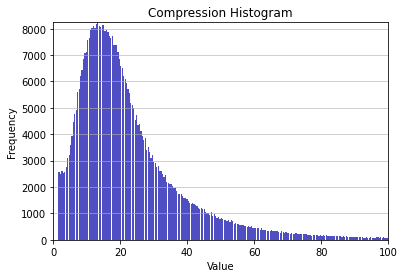

In [10]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df_reduced["compression"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Compression Histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(xmin = 0, xmax = 100)

In [11]:
# compression over 100: 

df_high_compression = df_reduced[df_reduced["compression"] > 100]
df_high_compression = df_high_compression[["text", "summary", "compression"]]
print(len(df_high_compression))
#df_high_compression.head()

6509


In [12]:
# Highest compression

#id_high = df_high_compression.reset_index()['compression'].idxmax()
#test = df_high_compression.reset_index().iloc[id_high]
#test

In [13]:
# compression over 1000: 

df_high_compression_1000 = df_reduced[df_reduced["compression"] > 1000]
df_high_compression_1000 = df_high_compression_1000[["text", "summary", "compression"]]
print(len(df_high_compression_1000))
#df_high_compression_1000.head()

31


In [14]:
# compression under 0: 

df_low_compression = df_reduced[df_reduced["compression"] < 0]
len(df_low_compression)

0

In [7]:
df_reduced = df_reduced[df_reduced["compression"] < 1000]

print(f"data contains {np.round(100*len(df_reduced)/len(df),2)} % of the original data")

data contains 43.48 % of the original data


# Step 4: split into train and test

Using stratified split on density, coverage and compression

In [8]:
df_train, df_test = train_test_split(df_reduced, test_size=0.15, random_state=42, shuffle = True)

In [41]:
len(df_test)

73882

# Step 5: save training data and initial test data 

In [ ]:
#write_json("../data/train.jsonl", df_train.to_dict(orient = "records"))

#write_json("../data/test.jsonl", df_test.to_dict(orient = "records"))

# Step 6: manually find best test subset

#df_test[["text", "summary"]].tail(n = 200)

Good indices: 
686852
436033
467530
730055
631022
278971
380671
713115
801104
90044
948947
1070208
372256
1004442
513404
980240
522085


44977
824509
837627
14409
402303
1106396
843338
54987
1047231
460178
212572
677047
758701
93133
775380
290256
401096
763266
202560
267900
649266
1114883
757483
199020
570645
358509
178124
69725
947057
545779
30119
1034530
1042062
106198
240824
271391
1034851
516822
630079
1061391
582412
771864
6159
483498
1112527


In [9]:
indices = [686852,
436033,
467530,
730055,
631022,
278971,
380671,
713115,
801104,
90044,
948947,
1070208,
372256,
1004442,
513404,
980240,
522085,
44977,
824509,
837627,
14409,
402303,
1106396,
843338,
54987,
1047231,
460178,
212572,
677047,
758701,
93133,
775380,
290256,
401096,
763266,
202560,
267900,
649266,
1114883,
757483,
199020,
570645,
358509,
178124,
69725,
947057,
545779,
30119,
1034530,
1042062,
106198,
240824,
271391,
1034851,
516822,
630079,
1061391,
582412,
771864,
6159,
483498,
1112527]

In [11]:
df_test_manual = df_test.loc[indices]
len(df_test_manual)

#write_json("../data/test_manual_selection.jsonl", df_test_manual.to_dict(orient = "records"))

62

# Step 7: find test subset which only contains full sentences from the articles (or the first ones? if avaiable)

In [47]:
#df_test_small = df_test[0:100].copy()
df_test['startswith'] = df_test[["text", "summary"]].apply(lambda x: x.text.startswith(x.summary), axis=1)

In [48]:
df_test['startswith'].sum()

41

In [52]:
df_test_startswith = df_test[df_test['startswith'] == True]
len(df_test_startswith)

41

In [54]:
df_test_startswith[["text", "summary"]].head()

,text,summary
50090,"Advokatfirmaet Magnusson optrådte som ""legal advisor"" i salgsmaterialet, da Hesalight tog hul på gigantsalg af obligationer. Men firmaet føler sig misbrugt.\n\nVækstkometen Hesaligt rammes nu af endnu en sag, hvor en virksomhed mener sig misbrugt af LED-specialisten.\n\nAdvokatfirmaet Magnusson lægger således afstand til, at firmaet står opført som ""legal advisor"" i Hesalights salgsmateriale fra 2014.\n\nMaterialet blev udarbejdet i forbindelse med, at Hesalight tog hul på et gigantisk salg af virksomhedsobligationer til professionelle investorer, der har sikret firmaet lån for 585 mio. kr.\n\nMen ifølge partner Nikolaj Juhl Hansen har advok...\n\nEt abonnement på Finans giver dig ubegrænset adgang til alt indhold på finans.dk\n\nPrøv Finans gratis i 40 dage eller",Advokatfirmaet Magnusson optrådte som
112577,"Revisionsfirma finder ""alvorlige problemer"" i styring af økonomi i Teknik- og Miljøforvaltningen i København. ""Vi har i over et år ryddet op"", siger Bondam.\n\n- Det er meget beklageligt, at økonomistyringen i Teknik- og Miljøforvaltningen har været på et uacceptabelt niveau.\n\nSådan lyder teknik- og miljøborgmester Klaus Bondams (R) kommentar, efter at revisionsfirmaet Deloitte i en rapport har afdækket ""alvorlige problemer"" i forvaltningens daglige økonomiadministration.\n\n- Forvaltningen har selv været opmærksom på det, inden Deloittes rapport kom ud, og de har handlet hurtigt og professionelt, da problemerne blev opdaget. Deloitte har i rapporten kvitteret for det arbejde, der er sat i gang, skriver Klaus Bondam i en pressemeddelelse.\n\nDeloitte vurderer, at der i 2009 er perioder, hvor den basale økonomiadministration ikke understøttes af en sikker drift, skriver Berlingske Tidende. Københavns overborgmester, Ritt Bjerregaard, siger til avisen, at Økonomiudvalget vil følge udviklingen i teknik- og miljøforvaltningen tættere end hidtil.\n\nIfølge Klaus Bondam har hans forvaltning været i gang med at rydde op i økonomien i mere end et år, og Københavns Kommunes teknik- og miljøudvalg er løbende blevet orienteret om sagen. Oprydningen ventes først at være færdig i forbindelse med regnskabet for 2009.\n\n- Der er et stort oprydningsarbejde i gang, som bliver fulgt tæt af både interne og eksterne revisorer. Forvaltningen har i arbejdet opdaget økonomiske problemer, der bl.a. stammer helt tilbage fra før min borgmestertid. Vi skal sikre, at dette ikke kan ske igen, skriver Bondam.\n\nOprydningen består bl.a. af en ny økonomistyringsmodel og en modernisering af it-systemet. Desuden ryddes der op i alle gamle afstemninger og udeståender.\n\nDeloitte har gennemgået alle forvaltningerne i Københavns Kommune og fundet fejl alle steder. Værst ser det dog ud i Teknik- og Miljøforvaltningen, skriver Berlingske Tidende.",Revisionsfirma finder
408328,"Bollywood-filmen ""My name is Khan"", der i dag har premiere ved årets filmfestival i Berlin, er kritisk over for USA.\n\nAf Kristian LindbergFredag den 12. februar 2010, 06:29\n\nDen indiske film ""My name is Khan"", der i dag har gallapremiere ved filmfestivalen i Berlin, er et tre timer langt Bollywood-eventyr med den indiske superstjerne Shah Rukh Khan i hovedrollen. Filmen er blevet truet med boykot og blokade af yderligtgående hinduer i Indien, men i Berlin vil de iskolde temperaturer formentlig lægge en dæmper på lokale protester mod filmen.\n\nFilmen, der torsdag aften blev vist for pressen, handler om den autistiske dreng Rizvan Khan, der vokser op i den muslimske del af Mumbai. Da han skræmmes af sammenstød mellem muslimer og hinduer, opdrager hans mor ham til tolerance. Som voksen rejser Rizvan til USA, hvor han oplever, at muslimer bliver forfulgt af politiet og almindelige amerikanere efter angrebet på World Trade Center. Selv bliver han gift med en amerikansk-indisk hindu, men skilles fra hende, da deres søn bliver slået ihjel af muslimfjendske unge. Under en Katrina-lignende katastrofe hjælper han en gruppe nødstedte sorte amerikanere, 